In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import requests
import matplotlib
import wget
import re
from sodapy import Socrata

#'Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 
#'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 
#'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid',
#'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel',
#'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10'
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

idx_pd = pd.IndexSlice

**GUTHUB REPO**
https://e.infogram.com/01266038-4580-4cf0-baab-a532bd968d0c?parent_url=https%3A%2F%2Fwww.ins.gov.co%2FNoticias%2FPaginas%2FCoronavirus.aspx&src=embed#

In [7]:
client = Socrata("www.datos.gov.co", None)
results = client.get("gt2j-8ykr", limit=100000)
df = pd.DataFrame.from_records(results)

In [9]:
df =df.set_index("id_de_caso", drop=True)

In [11]:
df.dtypes

fecha_de_notificaci_n    object
c_digo_divipola          object
ciudad_de_ubicaci_n      object
departamento             object
atenci_n                 object
edad                     object
sexo                     object
tipo                     object
estado                   object
pa_s_de_procedencia      object
fis                      object
fecha_diagnostico        object
fecha_recuperado         object
fecha_reporte_web        object
tipo_recuperaci_n        object
codigo_departamento      object
codigo_pais              object
pertenencia_etnica       object
fecha_de_muerte          object
dtype: object

In [15]:
df = df.astype({'fecha_de_notificaci_n': np.datetime64,
                'c_digo_divipola': str,
                'ciudad_de_ubicaci_n': str,
                'departamento': str,
                'atenci_n': str,
                'edad': np.int32,
                'sexo': str,
                'tipo': str,
                'estado': str,
                'pa_s_de_procedencia': str,
                'fis': str,
                'fecha_diagnostico': str,
                'fecha_recuperado': str,
                'fecha_reporte_web': str,
                'tipo_recuperaci_n': str,
                "codigo_departamento": str,
                "codigo_pais": str,
                "pertenencia_etnica": str,
                'fecha_de_muerte': str})

In [16]:
df["rango_edad"] = pd.cut(df["edad"], np.arange(0, 110, 10))

In [17]:
df["rango_edad"] = df["rango_edad"].astype(str)

In [18]:
total_por_rango_de_edad = df.groupby(["rango_edad"])["estado"].agg(["count"])

In [19]:
df.atenci_n.unique()

array(['Recuperado', 'Fallecido', 'Hospital UCI', 'Hospital', 'N/A',
       'Casa'], dtype=object)

In [20]:
total_por_rango_de_edad

,count
rango_edad,
"(0.0, 10.0]",2626
"(10.0, 20.0]",5714
"(20.0, 30.0]",14376
"(30.0, 40.0]",13803
"(40.0, 50.0]",9586
"(50.0, 60.0]",7873
"(60.0, 70.0]",4762
"(70.0, 80.0]",2627
"(80.0, 90.0]",1280


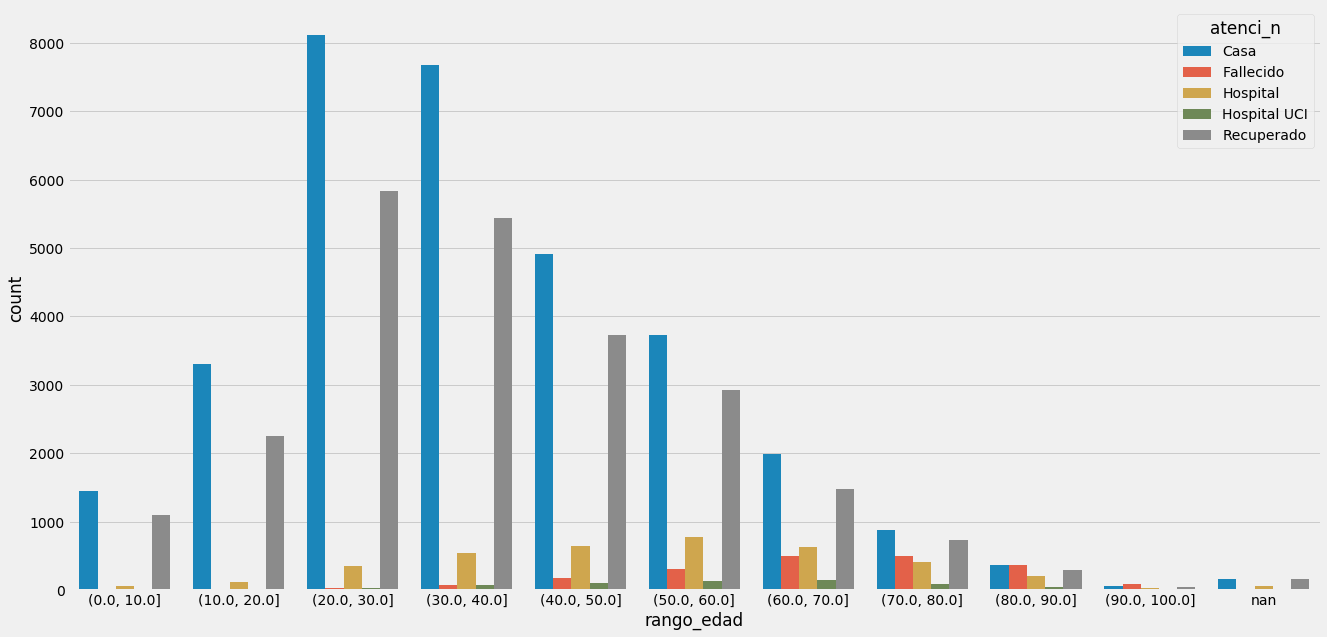

In [21]:
aux = df.groupby(["rango_edad", "atenci_n"])["atenci_n"].agg(["count"])
ex = aux.rename(columns={"atenci_n": "count"}).reset_index()
ex = ex.rename(columns={0: "count"})
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="atenci_n", 
                 data=ex[ex["atenci_n"].isin(["Recuperado", "Fallecido", "Hospital UCI", "Hospital", "Casa"])])

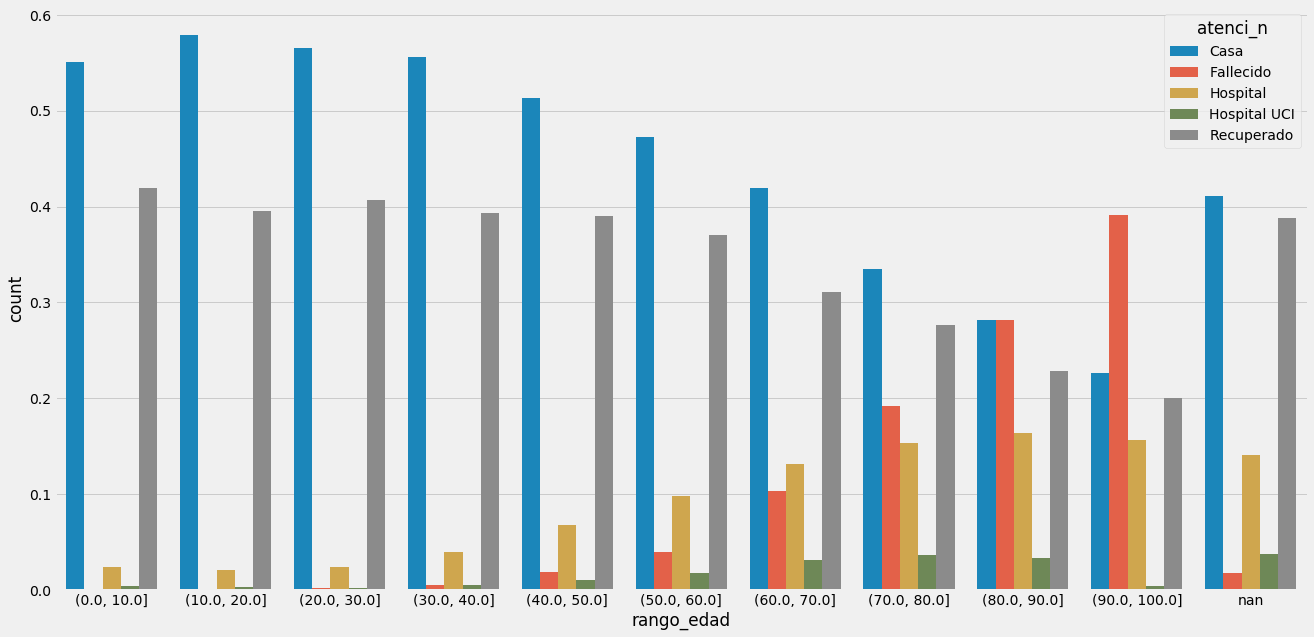

In [22]:
aux = df.groupby(["rango_edad", "atenci_n"])["atenci_n"].agg(["count"])
aux = aux.loc[:,:]/total_por_rango_de_edad
ex = aux.rename(columns={"atenci_n": "count"}).reset_index()
ex = ex.rename(columns={0: "count"})
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="atenci_n", 
                 data=ex[ex["atenci_n"].isin(["Recuperado", "Fallecido", "Hospital UCI", "Hospital", "Casa"])])

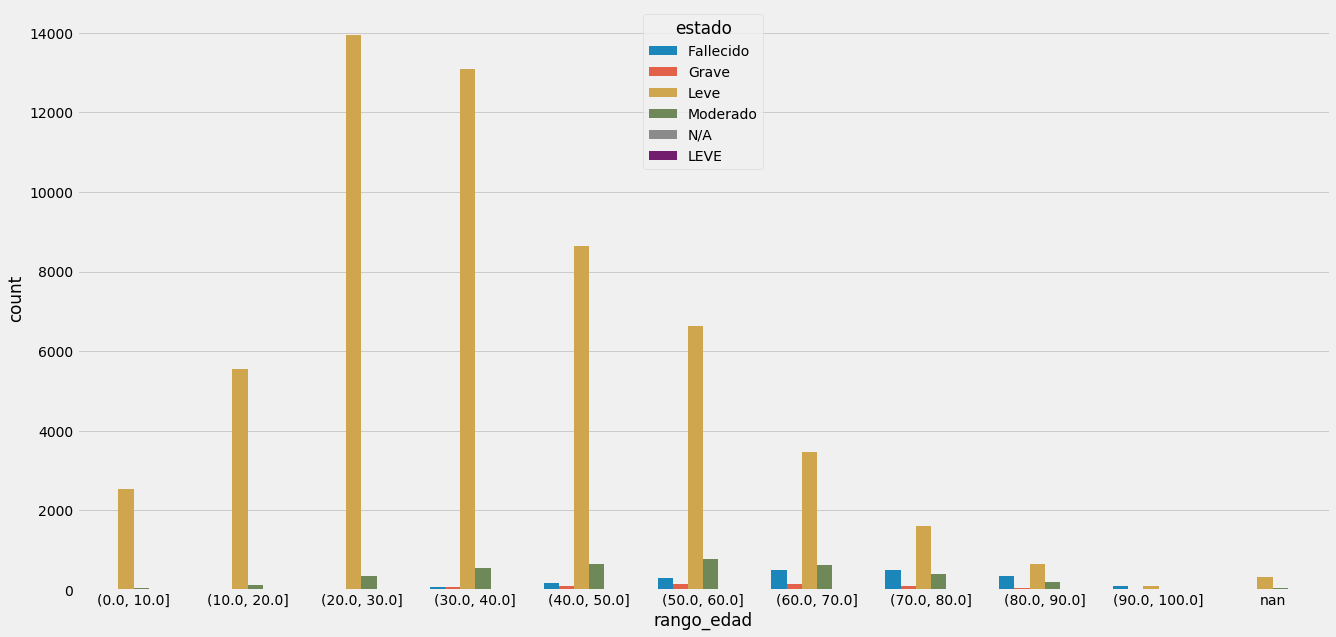

In [23]:
aux = df.groupby(["rango_edad", "estado"])["estado"].agg(["count"])
ex = aux.rename(columns={"estado": "count"}).reset_index()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="estado", 
                 data=ex)

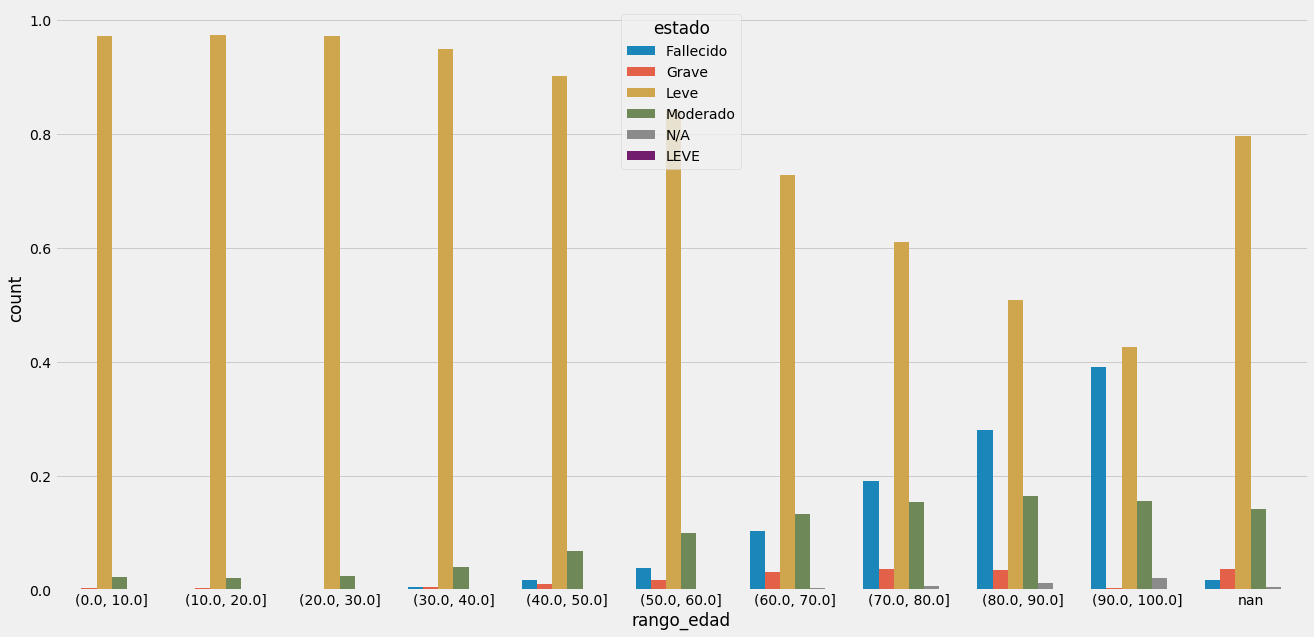

In [24]:
aux = df.groupby(["rango_edad", "estado"])["estado"].agg(["count"])
aux = aux.loc[:,:]/total_por_rango_de_edad
ex = aux.rename(columns={"estado": "count"}).reset_index()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="rango_edad", y="count", 
                 hue="estado", 
                 data=ex)

In [116]:
#df[['Day', 'Month', 'Year']] = df['fecha_diagnostico'].str.split("/", expand=True)

In [6]:
#df['Day'] = df['Day'].astype(int)
#df['Month'] = df['Month'].astype(int)

In [7]:
#df['Year'] = ('20' + df['Year'].str[-2:])

In [8]:
#df['Fecha'] = df['Day'].astype(str)+ '/' + df['Month'].astype(str) + '/' + df['Year']

In [9]:
df['Fecha'] =  pd.to_datetime(df['fecha_diagnostico'], format='%Y/%m/%d')

In [10]:
df['edad'] = df['edad'].astype(str)

In [11]:
df['atenci_n'].unique()

array(['Recuperado', 'Casa', 'Fallecido', 'Hospital UCI', 'Hospital',
       'N/A'], dtype=object)

In [12]:
df['activos'] = ~df['atenci_n'].isin(['Recuperado', 'Fallecido'])

In [27]:
df

,fecha_de_notificaci_n,codigo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_de_muerte,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,Fecha,activos
id_de_caso,,,,,,,,,,,,,,,,,
1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Recuperado,Italia,2020-02-27T00:00:00.000,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,2020-03-06,False
2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Recuperado,España,2020-03-04T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,2020-03-09,False
3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Recuperado,España,2020-02-29T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,2020-03-09,False
4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Recuperado,Colombia,2020-03-06T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,2020-03-11,False
5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Recuperado,Colombia,2020-03-08T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,2020-03-11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12308,2020-05-06T00:00:00.000,13001,Cartagena de Indias,Cartagena D.T. y C.,Fallecido,59,F,En estudio,Fallecido,Colombia,2020-04-30T00:00:00.000,2020-05-09T00:00:00.000,2020-05-12T00:00:00.000,- -,2020-05-12T00:00:00.000,2020-05-12,False
12309,2020-05-09T00:00:00.000,23001,Montería,Córdoba,Casa,26,M,En estudio,Asintomático,Colombia,Asintomático,- -,2020-05-12T00:00:00.000,- -,2020-05-12T00:00:00.000,2020-05-12,True
12310,2020-05-08T00:00:00.000,8001,Barranquilla,Barranquilla D.E.,Casa,0,F,En estudio,Leve,Colombia,2020-05-07T00:00:00.000,- -,2020-05-12T00:00:00.000,- -,2020-05-12T00:00:00.000,2020-05-12,True


# Total cases

## By Department

In [13]:
total_cases = df.groupby(["departamento", "Fecha"])['edad'].count()\
                    .groupby(level=[0]).cumsum().to_frame().rename(columns={'edad': 'Casos Totales'})
total_cases = total_cases.sort_index(level=[0, 1])
total_cases = total_cases.unstack(1).fillna(method='ffill', axis=1)
total_cases = total_cases.sort_values(by=total_cases.columns[-1], ascending=False)
total_cases.head(10)

Casos Totales                                              \
Fecha                  2020-03-06 2020-03-09 2020-03-11 2020-03-12 2020-03-13   
departamento                                                                    
Bogotá D.C.                   1.0        1.0        3.0        5.0        6.0   
Valle del Cauca               NaN        1.0        1.0        1.0        3.0   
Meta                          NaN        NaN        NaN        NaN        1.0   
Cartagena D.T. y C.           NaN        NaN        1.0        1.0        1.0   
Amazonas                      NaN        NaN        NaN        NaN        NaN   
Atlántico                     NaN        NaN        NaN        NaN        NaN   
Barranquilla D.E.             NaN        NaN        NaN        NaN        NaN   
Antioquia                     NaN        1.0        4.0        4.0        4.0   
Nariño                        NaN        NaN        NaN        NaN        NaN   
Cundinamarca                  NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fecha               2020-03-14 2020-03-15 2020-03-16 2020-03-17 2020-03-18   
departamento                                                                 
Bogotá D.C.               16.0       26.0       32.0       39.0       44.0   
Valle del Cauca            3.0        3.0        5.0       13.0       13.0   
Meta                       1.0        1.0        1.0        1.0        1.0   
Cartagena D.T. y C.        1.0        3.0        5.0        6.0        9.0   
Amazonas                   NaN        NaN        NaN        NaN        NaN   
Atlántico                  NaN        NaN        NaN        NaN        NaN   
Barranquilla D.E.          NaN        NaN        2.0        2.0        2.0   
Antioquia                  7.0        8.0        8.0        8.0        8.0   
Nariño                     NaN        NaN        NaN        NaN        NaN   
Cundinamarca               NaN        1.0        2.0        4.0        4.0   

                                                                            \
Fecha               2020-03-19 2020-03-20 2020-03-21 2020-03-22 2020-03-23   
departamento                                                                 
Bogotá D.C.               52.0       79.0       84.0       88.0      117.0   
Valle del Cauca           14.0       15.0       27.0       32.0       38.0   
Meta                       1.0        1.0        1.0        1.0        5.0   
Cartagena D.T. y C.       10.0       11.0       15.0       15.0       16.0   
Amazonas                   NaN        NaN        NaN        NaN        NaN   
Atlántico                  NaN        NaN        NaN        NaN        NaN   
Barranquilla D.E.          5.0        5.0        7.0        7.0        7.0   
Antioquia                 11.0       22.0       25.0       30.0       52.0   
Nariño                     NaN        NaN        NaN        NaN        NaN   
Cundinamarca               5.0       10.0       12.0       12.0       17.0   

                                                                            \
Fecha               2020-03-24 2020-03-25 2020-03-26 2020-03-27 2020-03-28   
departamento                                                                 
Bogotá D.C.              158.0      172.0      179.0      217.0      255.0   
Valle del Cauca           67.0       72.0       74.0       74.0       85.0   
Meta                       7.0        8.0        8.0        8.0        8.0   
Cartagena D.T. y C.       21.0       26.0       26.0       26.0       27.0   
Amazonas                   NaN        NaN        NaN        NaN        NaN   
Atlántico                  NaN        1.0        1.0        3.0        4.0   
Barranquilla D.E.          9.0       12.0       12.0       13.0       16.0   
Antioquia                 52.0       60.0       60.0       60.0       67.0   
Nariño                     1.0        1.0        1.0        1.0        2.0   


In [14]:
dict_population = {'Bogotá D.C.': 8.181,
                   'Valle del Cauca': 4.708,
                   'Antioquia': 6.690,
                   'Meta': 1.016,
                   'Cartagena D.T. y C.': 0.914,
                   'Cundinamarca': 2.804,
                   'Risaralda': 0.967,
                   'Barranquilla D.E.':1.206,
                   'Santa Marta D.T. y C.': 0.499,
                   'Nariño': 1.809,
                   'Huila': 1.197,
                   'Atlántico': 1.34,
                   'Amazonas': 0.078,
                   'Norte de Santander': 1.391,
                   'Tolima': 1.419,
                   'Quindio': 0.574,
                   'Caldas': 0.993,
                   'Cesar': 1.065,
                   'Santander': 2.09,
                   'Boyacá': 1.281,
                   'Cauca': 1.416,
                   'Magdalena': 0.799,
                   'Córdoba': 1.788,
                   'Buenaventura D.E.': 0.432,
                   'Bolívar': 1.257,
                   'Casanare': 0.375,
                   'Chocó': 0.515,
                   'Caquetá': 0.496,
                   'Archipiélago de San Andrés Providencia y Santa Catalina': 0.078,
                   'La Guajira':1.040,
                   'Sucre': 0.877}

In [15]:
latin_names_plot = total_cases.index.to_list()[:20]

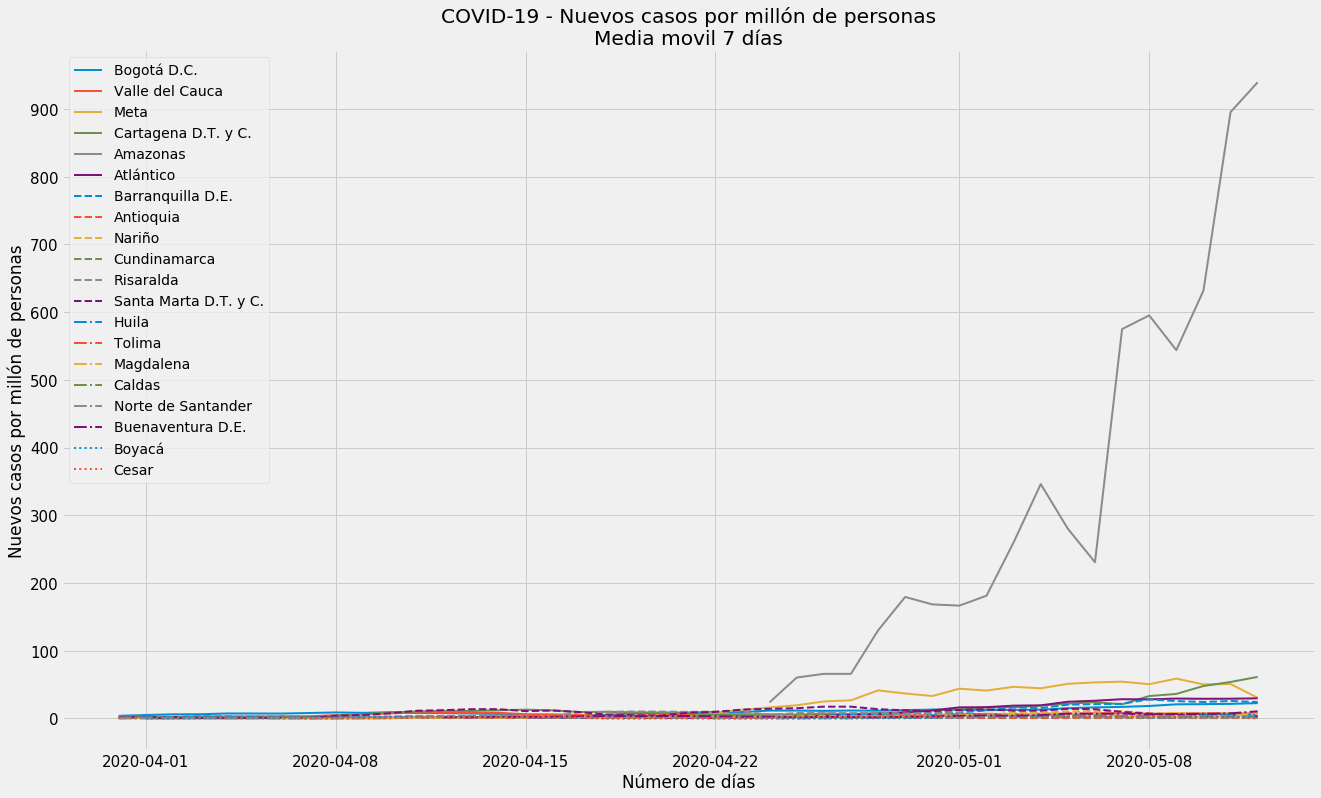

In [20]:
fig, ax = plt.subplots(figsize=(20,12))
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
colors = [f'C{i}' for i in range(6)]

low_cases = 0
high_cases = 2000000
max_periods = 55
ls = 0
count = 0
window = 7
text_loc_y = -3
start = 15
for name in latin_names_plot:
    row = total_cases.loc[name, :][start:]
    if name in latin_names_plot:
        if (row.min()<0.1*high_cases) & (name not in []):
            #current_data = row[(row>=low_cases) & (row<=high_cases)]#/dict_population[name]).rolling(7).mean()
            current_data = row
            current_data = current_data - current_data.shift(1)
            current_data = (current_data/dict_population[name]).rolling(window).mean()
            #current_data = current_data[~current_data.isnull()]
            if current_data.max()>1000:
                continue
            if len(current_data)>0:
                c_i = colors[count]
                ls_i = LINE_STYLES[ls]
                values_to_plot = current_data.values[0:]
                if name in ['Colombia']:
                    ax.plot(current_data.index.levels[1][start:], values_to_plot, label=name, lw=5.5, 
                            linestyle=ls_i, color=c_i, alpha=0.7)
                else:
                    ax.plot(current_data.index.levels[1][start:], values_to_plot, label=name, lw=2., 
                            linestyle=ls_i, color=c_i)
            # Changing colors
            if count>4:
                count=0
                ls+=1
            else:
                count+=1
        else:
            pass
    ax.legend(fontsize=14, loc=2)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_yticks([100*i for i in range(0,10)])
    #ax.set_xticks([1] + list(range(5, max_periods,5)))
    ax.set_xlabel(f'Número de días')
    ax.set_ylabel("Nuevos casos por millón de personas")
    #ax.text(max_periods*0.8, text_loc_y, f'Update: {df.columns[-1]}')
    #ax.text(-1, text_loc_y, 'Fuente:: INS')
    ax.set_title(f"COVID-19 - Nuevos casos por millón de personas\nMedia movil 7 días")
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
plt.show()

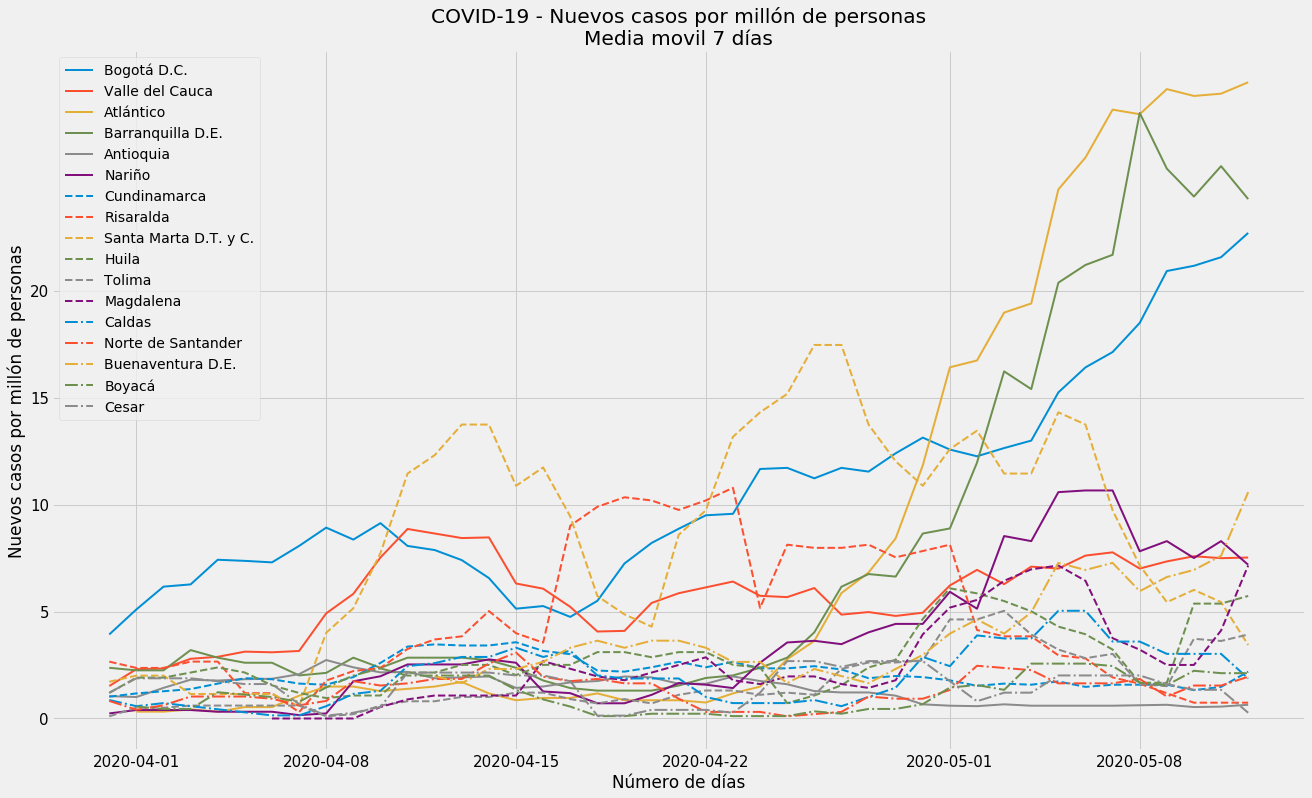

In [17]:
fig, ax = plt.subplots(figsize=(20,12))
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
colors = [f'C{i}' for i in range(6)]

low_cases = 0
high_cases = 2000000
max_periods = 55
ls = 0
count = 0
window = 7
text_loc_y = -3
start = 15
for name in latin_names_plot:
    row = total_cases.loc[name, :][start:]
    if name in latin_names_plot:
        if (row.min()<0.1*high_cases) & (name not in []):
            #current_data = row[(row>=low_cases) & (row<=high_cases)]#/dict_population[name]).rolling(7).mean()
            current_data = row
            current_data = current_data - current_data.shift(1)
            current_data = (current_data/dict_population[name]).rolling(window).mean()
            #current_data = current_data[~current_data.isnull()]
            if current_data.max()>50:
                continue
            if len(current_data)>0:
                c_i = colors[count]
                ls_i = LINE_STYLES[ls]
                values_to_plot = current_data.values[0:]
                if name in ['Colombia']:
                    ax.plot(current_data.index.levels[1][start:], values_to_plot, label=name, lw=5.5, 
                            linestyle=ls_i, color=c_i, alpha=0.7)
                else:
                    ax.plot(current_data.index.levels[1][start:], values_to_plot, label=name, lw=2., 
                            linestyle=ls_i, color=c_i)
            # Changing colors
            if count>4:
                count=0
                ls+=1
            else:
                count+=1
        else:
            pass
    ax.legend(fontsize=14, loc=2)
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_yticks([5*i for i in range(0,5)])
    #ax.set_xticks([1] + list(range(5, max_periods,5)))
    ax.set_xlabel(f'Número de días')
    ax.set_ylabel("Nuevos casos por millón de personas")
    #ax.text(max_periods*0.8, text_loc_y, f'Update: {df.columns[-1]}')
    #ax.text(-1, text_loc_y, 'Fuente:: INS')
    ax.set_title(f"COVID-19 - Nuevos casos por millón de personas\nMedia movil 7 días")
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
plt.show()

## By City

In [21]:
total_cases_city = df[df['activos']].groupby(["ciudad_de_ubicaci_n", "Fecha"])['edad'].count()\
                    .groupby(level=[0]).cumsum().to_frame().rename(columns={'edad': 'Casos Activos'})
total_cases_city = total_cases_city.sort_index(level=[0, 1])
total_cases_city = total_cases_city.unstack(1).fillna(method='ffill', axis=1)
total_cases_city = total_cases_city.sort_values(by=total_cases_city.columns[-1], ascending=False)
total_cases_city.head(30)

Casos Activos                                   \
Fecha                   2020-03-13 2020-03-15 2020-03-17 2020-03-18   
ciudad_de_ubicaci_n                                                   
Bogotá D.C.                    NaN        1.0        1.0        1.0   
Villavicencio                  NaN        NaN        NaN        NaN   
Cali                           1.0        1.0        2.0        2.0   
Leticia                        NaN        NaN        NaN        NaN   
Cartagena de Indias            NaN        NaN        NaN        NaN   
Barranquilla                   NaN        NaN        NaN        NaN   
Soledad                        NaN        NaN        NaN        NaN   
San Andrés de Tumaco           NaN        NaN        NaN        NaN   
Medellín                       NaN        NaN        NaN        NaN   
Santa Marta                    NaN        NaN        NaN        NaN   
Ipiales                        NaN        NaN        NaN        NaN   
Malambo                        NaN        NaN        NaN        NaN   
Ibagué                         NaN        NaN        NaN        NaN   
Buenaventura                   NaN        NaN        NaN        NaN   
Sabanagrande                   NaN        NaN        NaN        NaN   
Neiva                          NaN        NaN        NaN        NaN   
Soacha                         NaN        NaN        NaN        NaN   
Pereira                        NaN        NaN        NaN        1.0   
Ciénaga                        NaN        NaN        NaN        NaN   
Cúcuta                         NaN        NaN        NaN        NaN   
La Dorada                      NaN        NaN        NaN        NaN   
Pasto                          NaN        NaN        NaN        NaN   
Puebloviejo                    NaN        NaN        NaN        NaN   
Chocó                          NaN        NaN        NaN        NaN   
Dosquebradas                   NaN        NaN        NaN        NaN   
Palmira                        NaN        NaN        NaN        NaN   
Jamundí                        NaN        NaN        NaN        NaN   
Gigante                        NaN        NaN        NaN        NaN   
Bello                          NaN        NaN        NaN        NaN   
Florencia                      NaN        NaN        NaN        NaN   

                                                                             \
Fecha                2020-03-19 2020-03-20 2020-03-21 2020-03-22 2020-03-23   
ciudad_de_ubicaci_n                                                           
Bogotá D.C.                 4.0        4.0        4.0        4.0        5.0   
Villavicencio               NaN        NaN        NaN        NaN        NaN   
Cali                        2.0        2.0        3.0        3.0        3.0   
Leticia                     NaN        NaN        NaN        NaN        NaN   
Cartagena de Indias         NaN        NaN        NaN        NaN        NaN   
Barranquilla                NaN        NaN        NaN        NaN        NaN   
Soledad                     NaN        NaN        NaN        NaN        NaN   
San Andrés de Tumaco        NaN        NaN        NaN        NaN        NaN   
Medellín                    NaN        1.0        1.0        2.0        4.0   
Santa Marta                 NaN        NaN        NaN        NaN        NaN   
Ipiales                     NaN        NaN        NaN        NaN        NaN   
Malambo                     NaN        NaN        NaN        NaN        NaN   
Ibagué                      NaN        NaN        NaN        NaN        NaN   
Buenaventura                NaN        NaN        NaN        NaN        NaN   
Sabanagrande                NaN        NaN        NaN        NaN        NaN   
Neiva                       NaN        NaN        NaN        NaN        NaN   
Soacha                      NaN        NaN        NaN        NaN        NaN   
Pereira                     1.0        1.0        1.0        1.0        1.0   
Ciénaga           

# Active cases

In [22]:
active_cases = df[df['activos']].groupby(["departamento", "Fecha"])['edad'].count()\
                    .groupby(level=[0]).cumsum().to_frame().rename(columns={'edad': 'Casos Totales'})
active_cases = active_cases.sort_index(level=[0, 1])
active_cases = active_cases.unstack(1).fillna(method='ffill', axis=1)
active_cases = active_cases.sort_values(by=active_cases.columns[-1], ascending=False)
active_cases.head(10)

Casos Totales                                              \
Fecha                  2020-03-13 2020-03-15 2020-03-17 2020-03-18 2020-03-19   
departamento                                                                    
Bogotá D.C.                   NaN        1.0        1.0        1.0        4.0   
Meta                          NaN        NaN        NaN        NaN        NaN   
Valle del Cauca               1.0        1.0        2.0        2.0        2.0   
Amazonas                      NaN        NaN        NaN        NaN        NaN   
Cartagena D.T. y C.           NaN        NaN        NaN        NaN        NaN   
Atlántico                     NaN        NaN        NaN        NaN        NaN   
Barranquilla D.E.             NaN        NaN        NaN        NaN        NaN   
Nariño                        NaN        NaN        NaN        NaN        NaN   
Antioquia                     NaN        NaN        NaN        NaN        NaN   
Cundinamarca                  NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fecha               2020-03-20 2020-03-21 2020-03-22 2020-03-23 2020-03-24   
departamento                                                                 
Bogotá D.C.                4.0        4.0        4.0        5.0        5.0   
Meta                       NaN        NaN        NaN        NaN        NaN   
Valle del Cauca            2.0        4.0        4.0        4.0        7.0   
Amazonas                   NaN        NaN        NaN        NaN        NaN   
Cartagena D.T. y C.        NaN        NaN        NaN        NaN        NaN   
Atlántico                  NaN        NaN        NaN        NaN        NaN   
Barranquilla D.E.          NaN        NaN        NaN        NaN        NaN   
Nariño                     NaN        NaN        NaN        NaN        NaN   
Antioquia                  1.0        1.0        2.0        5.0        5.0   
Cundinamarca               NaN        NaN        NaN        NaN        NaN   

                                                                            \
Fecha               2020-03-25 2020-03-27 2020-03-28 2020-03-29 2020-03-30   
departamento                                                                 
Bogotá D.C.                6.0        7.0        7.0       14.0       16.0   
Meta                       NaN        NaN        NaN        NaN        NaN   
Valle del Cauca            7.0        7.0        8.0        9.0       12.0   
Amazonas                   NaN        NaN        NaN        NaN        NaN   
Cartagena D.T. y C.        NaN        NaN        NaN        1.0        2.0   
Atlántico                  NaN        NaN        NaN        NaN        NaN   
Barranquilla D.E.          NaN        NaN        NaN        1.0        1.0   
Nariño                     NaN        NaN        NaN        NaN        NaN   
Antioquia                  5.0        5.0        6.0        6.0        8.0   
Cundinamarca               1.0        1.0        1.0        1.0        1.0   

                                                                            \
Fecha               2020-03-31 2020-04-01 2020-04-02 2020-04-03 2020-04-04   
departamento                                                                 
Bogotá D.C.               16.0       17.0       21.0       29.0       37.0   
Meta                       NaN        NaN        NaN        NaN        NaN   
Valle del Cauca           16.0       18.0       19.0       22.0       22.0   
Amazonas                   NaN        NaN        NaN        NaN        NaN   
Cartagena D.T. y C.        2.0        2.0        2.0        2.0        2.0   
Atlántico                  NaN        NaN        NaN        NaN        NaN   
Barranquilla D.E.          1.0        1.0        1.0        1.0        1.0   
Nariño                     NaN        NaN        NaN        NaN        NaN   
Antioquia                 10.0       10.0       10.0       11.0       11.0   


In [23]:
names_to_plot = []
for per_name in total_cases.index.tolist()[:23]:
    if per_name not in names_to_plot:
        names_to_plot.append(per_name)

In [24]:
def plot_history(df, low_cases=1, high_cases=100, max_periods=20, title="Casos totales reportados"):
    fig, ax = plt.subplots(figsize=(20,12))
    LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted', 'solid',]
    colors = [f'C{i}' for i in range(6)]
    ls = 0
    count = 0
    for name in names_to_plot:
        if name in df.index:
            row = df.loc[name, :]
            if name in names_to_plot:
                if (row.min()<0.1*high_cases) & (name not in []):
                    c_i = colors[count]
                    ls_i = LINE_STYLES[ls]
                    current_data = row[(row>=low_cases) & (row<=high_cases)]
                    if len(current_data)>0:
                        values_to_plot = current_data.values[:max_periods]
                        if name in ['Bogotá D.C.', 'Antioquia', 'Valle del Cauca', "Cartagena D.T. y C.", "Risaralda", "Cundinamarca"]:
                            ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=5.5, 
                                    linestyle=ls_i, color=c_i, alpha=0.5)
                        else:
                            ax.plot(np.arange(1,len(values_to_plot)+1), values_to_plot, label=name, lw=2., 
                                    linestyle=ls_i, color=c_i)
                    # Changing colors
                    if count>4:
                        count=0
                        ls+=1
                    else:
                        count+=1
                else:
                    pass
            ax.legend(fontsize=14, loc=2)
            ax.set_yscale('log')
            ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
            ax.set_yticks([10**i*j*low_cases for j in [1,2,5] for i in np.arange(0, 3, 1.0)])
            ax.set_xticks(range(1, max_periods,1))
            ax.set_xlabel(f'Número de días después de reportas al menos {low_cases} casos')
            ax.set_ylabel(title)
            ax.set_title(f"COVID-19 {title} por Dpto después de reportar por lo menos {low_cases} casos")
            ax.tick_params(axis='both', which='major', labelsize=15)
            ax.tick_params(axis='both', which='minor', labelsize=15)
            ax.text(max_periods*0.8, low_cases*0.5, f'Update: {df.columns[-1][1].strftime(format="%d/%m/%Y")}')
            ax.text(-0.0,low_cases*0.5, 'Fuente: Instituto Nacional de Salud')
    plt.show()

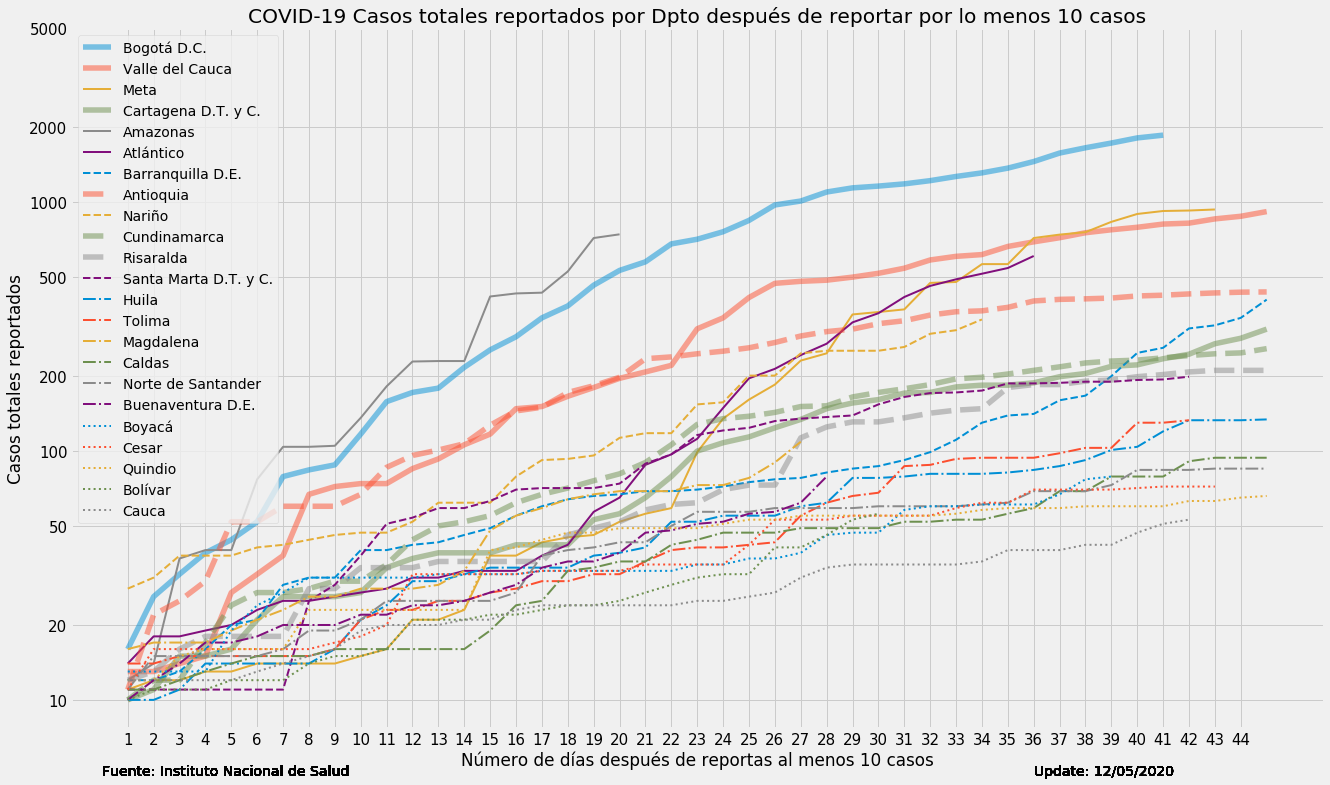

In [25]:
plot_history(total_cases, low_cases=10, high_cases=2000, max_periods=45)

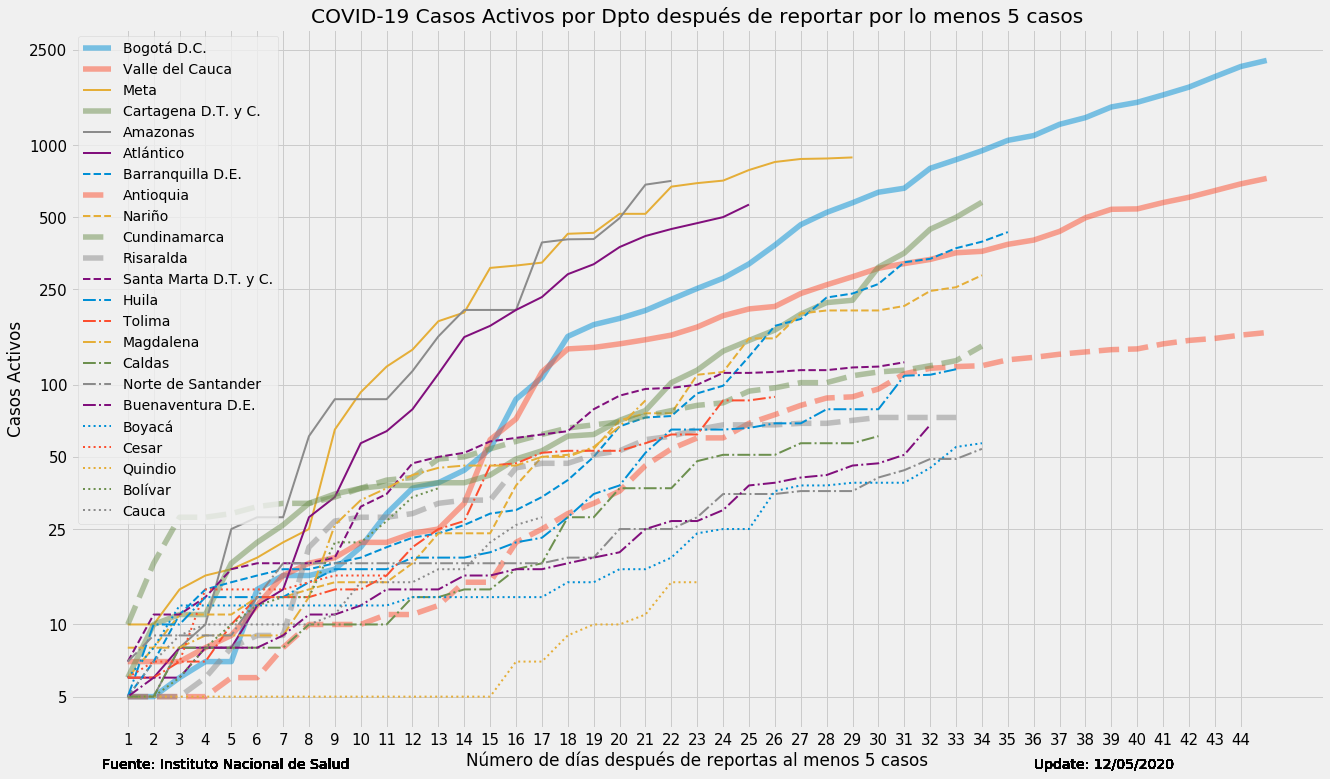

In [26]:
plot_history(active_cases, low_cases=5, high_cases=5000, max_periods=45, title="Casos Activos")

In [29]:
df

,fecha_de_notificaci_n,codigo_divipola,ciudad_de_ubicaci_n,departamento,atenci_n,edad,sexo,tipo,estado,pa_s_de_procedencia,fis,fecha_de_muerte,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,Fecha,activos
id_de_caso,,,,,,,,,,,,,,,,,
1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,Italia,2020-02-27T00:00:00.000,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,2020-03-06,False
2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,España,2020-03-04T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,2020-03-09,False
3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,España,2020-02-29T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,2020-03-09,False
4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,Colombia,2020-03-06T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,2020-03-11,False
5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,Colombia,2020-03-08T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,2020-03-11,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,2020-04-20T00:00:00.000,52835,San Andrés de Tumaco,Nariño,Casa,46,M,Relacionado,Leve,Colombia,2020-04-20T00:00:00.000,- -,2020-05-06T00:00:00.000,- -,2020-05-06T00:00:00.000,2020-05-06,True
8996,2020-04-28T00:00:00.000,52356,Ipiales,Nariño,Casa,31,M,Relacionado,Leve,Colombia,Asintomático,- -,2020-05-06T00:00:00.000,- -,2020-05-06T00:00:00.000,2020-05-06,True
8997,2020-04-28T00:00:00.000,52356,Ipiales,Nariño,Casa,32,M,Relacionado,Leve,Colombia,Asintomático,- -,2020-05-06T00:00:00.000,- -,2020-05-06T00:00:00.000,2020-05-06,True


In [30]:
total_cases.index[:7]

Index(['Bogotá D.C.', 'Valle del Cauca', 'Meta', 'Antioquia',
       'Cartagena D.T. y C.', 'Atlántico', 'Barranquilla D.E.'],
      dtype='object', name='departamento')

In [31]:
top_departments = df[df['departamento'].isin(total_cases.index[:5])]

In [32]:
top_departments['Fecha'] = top_departments['Fecha'].dt.strftime('%m-%d')

/Users/camilovelasquez/anaconda3/envs/general/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


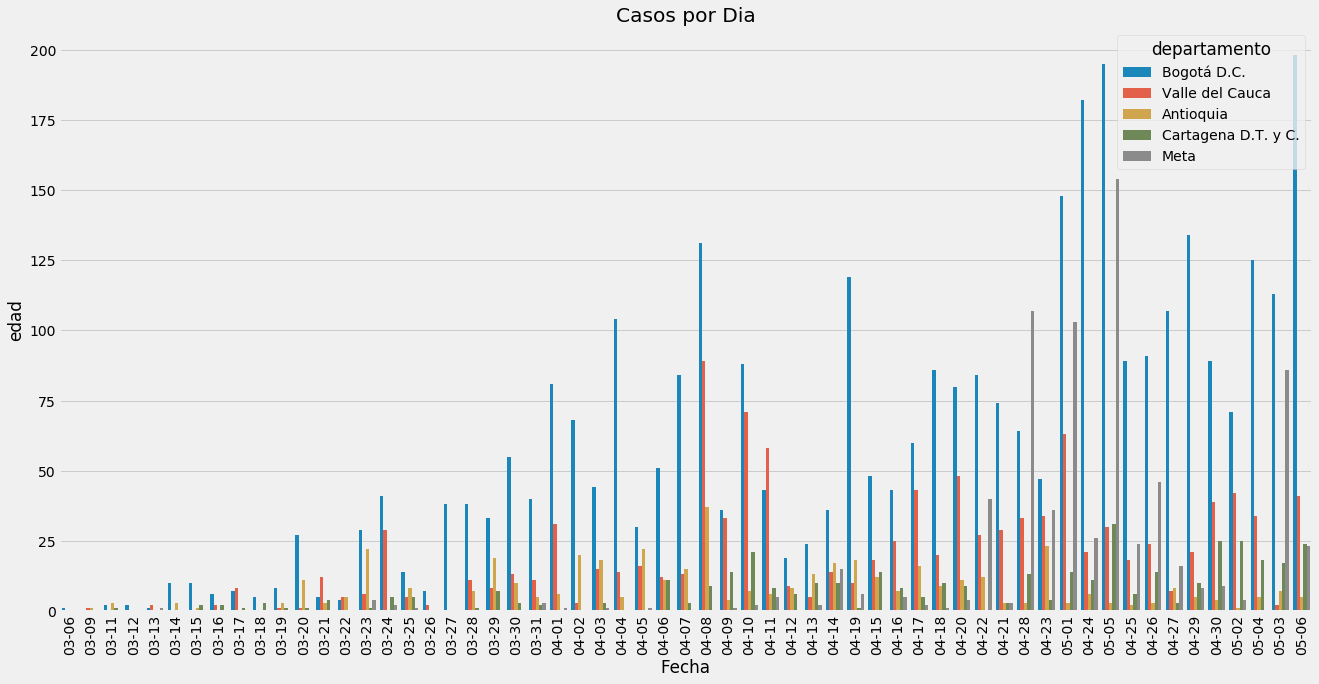

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x='Fecha', y='edad', data=top_departments, hue='departamento', estimator=len, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Casos por Dia")
plt.show()